In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

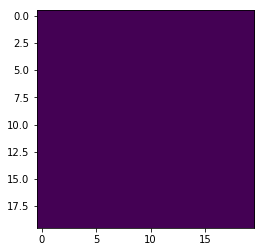

In [3]:
arr = np.zeros((20,20))
plt.imshow(arr)
plt.show()

In [4]:
'''https://stackoverflow.com/questions/13652518/efficiently-find-points-inside-a-circle-sector'''



def is_clockwise(dp1, dp2):
    return -dp1[0]*dp2[1] + dp1[1]*dp2[0] > 0

def is_counter_clockwise(dp1, dp2):
    return -dp1[0]*dp2[1] + dp1[1]*dp2[0] < 0

def is_in_sector(start, end, dp):
    return is_clockwise(end, dp) and is_counter_clockwise(start, dp)

start = (2,1)
end = (1, 2)
dp = (1,1)
is_in_sector(start, end, dp)

True

In [5]:
import itertools
def select_sector(shape, angle, angle_dif, position):
    '''
    For a 2d array of a given size,  
    return the indexs of the value that are in the sector,  
    the sector is specified by the start angle (angle), the difference between the start an the end (dif_angle) and it's center (position)
    '''
    start = [
        np.cos(angle),
        np.sin(angle)
    ]

    end = [
        np.cos(angle + dif),
        np.sin(angle + dif)
    ]
        
    idxs = []
    
    for x, y in itertools.product(range(shape[0]), range(shape[1])):
        dp = (x - position[0], y - position[1])
        if is_in_sector(start, end, dp):
            idxs.append((x,y))

    return np.array(idxs)
    

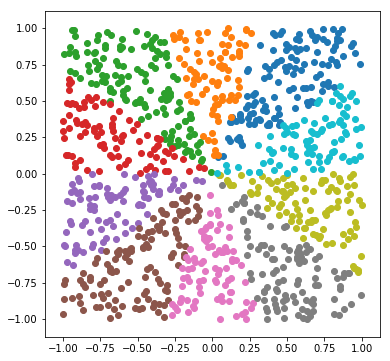

In [6]:
from random import random

arr = np.zeros((20,20))
dif = np.pi / 5

corners = np.array([
    [-1,-1],
    [1, -1],
    [-1, 1],
    [1,1]
])

fig = plt.figure(figsize=(6,6))
plt.scatter(corners[:,0], corners[:,1], c='white')

for v in np.linspace(dif, 2*np.pi, 10):

    start = [
        np.cos(v),
        np.sin(v)
    ]

    end = [
        np.cos(v + dif),
        np.sin(v + dif)
    ]

    dps = np.array([(2*(random()-.5),2*(random()-.5)) for i in range(1000)])

    in_dps = []

    for dp in dps:
        if is_in_sector(start, end, dp):
            in_dps.append(dp)

    in_dps = np.array(in_dps)

    plt.scatter(in_dps[:,0], in_dps[:,1])

    #plt.scatter([start[0], end[0]], [start[1], end[1]], c='r')
    
plt.show()



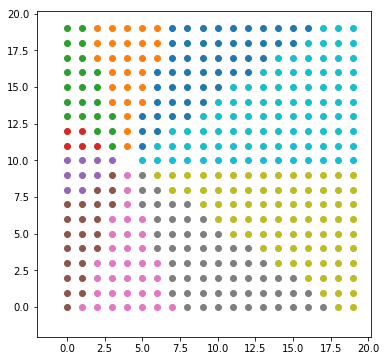

In [7]:

corners = np.array([
    [-1,-1],
    [1, -1],
    [-1, 1],
    [1,1]
])

fig = plt.figure(figsize=(6,6))

n_slice = 10
dif = 2*np.pi / n_slice

plt.scatter(corners[:,0], corners[:,1], c='white')

for v in np.linspace(dif, 2*np.pi, n_slice):

    start = [
        np.cos(v),
        np.sin(v)
    ]

    end = [
        np.cos(v + dif),
        np.sin(v + dif)
    ]

    selected_dps = select_sector((20,20), v, dif, (4,10))

    plt.scatter(selected_dps[:,0], selected_dps[:,1])

    #plt.scatter([start[0], end[0]], [start[1], end[1]], c='r')
    
plt.show()


In [8]:
import pickle, os
directory = '/home/alexandre/Documents/TM/main/data/'
with open(os.path.join(directory,'grid.pickle'), 'rb') as file:
    grid = pickle.load(file)



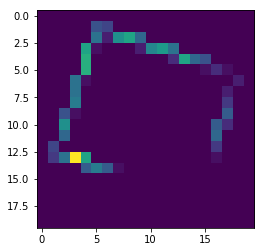

In [9]:
plt.imshow(grid)
plt.show()

In [10]:
def dist(dp0, dp1):
    '''Return the distance between two datapoints'''
    return np.sqrt((abs(dp0[0] - dp1[0]))**2 + (abs(dp0[1] - dp1[1]))**2)



def get_cummulated_values(grid, idxs, position):
    '''Sum the selected values of the grid while taking account the distance'''
    total = 0
    for idx in idxs:
        if (idx != position).all():
            total += grid[idx[0], idx[1]] / dist(idx, position)
    return total

def get_min_distances(idxs, position):
        distances = []
        for idx in idxs:
            distances.append(dist(idx, position))
        return min(distances)

In [11]:
import math
SHAPE = (20,20)
SIZE = 20
N_SECTORS = 12
DIF = 2 * math.pi / N_SECTORS
PADDED_SHAPE = (3*SIZE, 3*SIZE)
MIDDLE = (PADDED_SHAPE[0]//2, PADDED_SHAPE[0]//2)

def create_sectors_grid():
    grid = np.zeros(PADDED_SHAPE)
    for i, angle in enumerate(np.linspace(0, 2*math.pi-DIF, N_SECTORS)):
        idxs = select_sector(PADDED_SHAPE, angle, DIF, MIDDLE)
        grid[idxs[:,0], idxs[:,1]] = i
    return grid

In [12]:
def get_sectors_grid(sectors_grid, coord):
    '''Return a sectors grid adapted to the coord'''
    x = SIZE-coord[0]
    y = SIZE-coord[1]
    d_plus = int(SIZE*1.5)
    d_minus = int(SIZE*0.5)
    selected_grid = sectors_grid[x+d_minus:x+d_plus, y+d_minus:y+d_plus]
    return selected_grid

def get_idxs(sectors_grid, n):
    idxs_x, idxs_y = np.where(sectors_grid==n)
    return np.vstack((idxs_x, idxs_y)).T
    

In [29]:

inputs = np.zeros((N_SECTORS))

sectors_grid = create_sectors_grid()

coord = (10,10)

current_s_grid = get_sectors_grid(sectors_grid, coord)

for i in range(N_SECTORS):
    
    idxs = get_idxs(current_s_grid, i)
    if idxs.ndim == 2:
        print(idxs.shape)
        
        z_grid = np.zeros((20,20))
        
        z_grid[idxs[:,0],idxs[:,1]] = grid[idxs[:,0],idxs[:,1]]
        
        a = np.where(z_grid>0)
        
        print(a)
        
        sector = grid[idxs[:,0],idxs[:,1]]
        print(sector.shape)
        a = np.where(sector>0)
        print(a)
        
        inputs[i] = get_cummulated_values(grid, idxs, coord)

inputs *= 1/np.sum(inputs)
print(inputs)

(23, 2)
(array([], dtype=int64), array([], dtype=int64))
(23,)
(array([], dtype=int64),)
(37, 2)
(array([], dtype=int64), array([], dtype=int64))
(37,)
(array([], dtype=int64),)
(22, 2)
(array([11, 12, 13]), array([16, 16, 16]))
(22,)
(array([ 4, 10, 14]),)
(31, 2)
(array([ 6,  7,  8,  9, 10, 10]), array([18, 17, 17, 17, 16, 17]))
(31,)
(array([ 2,  5, 11, 19, 27, 28]),)
(41, 2)
(array([4, 4, 5, 5, 5]), array([14, 15, 15, 16, 17]))
(41,)
(array([18, 19, 26, 27, 28]),)
(27, 2)
(array([3, 3, 4, 4]), array([11, 12, 12, 13]))
(27,)
(array([14, 15, 19, 20]),)
(37, 2)
(array([1, 1, 2, 2, 2, 2, 3, 3]), array([ 5,  6,  6,  7,  8,  9,  9, 10]))
(37,)
(array([ 6,  7, 12, 13, 14, 15, 20, 21]),)
(46, 2)
(array([2, 3, 3, 4, 5, 6]), array([5, 4, 5, 4, 4, 4]))
(46,)
(array([15, 20, 21, 26, 31, 35]),)
(27, 2)
(array([6, 7, 8, 9, 9]), array([3, 3, 3, 2, 3]))
(27,)
(array([ 5,  9, 14, 20, 21]),)
(37, 2)
(array([10, 11, 12, 13, 13, 13, 13]), array([2, 2, 1, 1, 2, 3, 4]))
(37,)
(array([ 2, 12, 20, 27, 28,

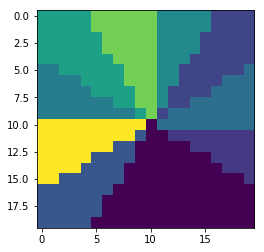

In [14]:
view_grid = np.zeros((20,20))

for i in range(N_SECTORS):
    
    idxs = get_idxs(current_s_grid, i)
    if idxs.ndim == 2:
        
        view_grid[idxs[:,0], idxs[:,1]] = inputs[i]
        
plt.imshow(view_grid)

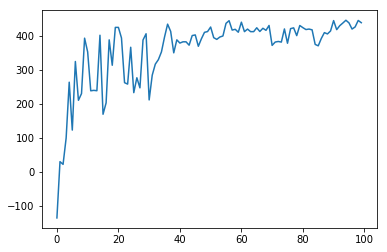

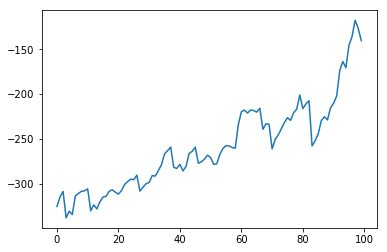

In [15]:
def room_dif(means, size, room_length):
    bool_color = True
    for i in range(size):
        bool_color = not bool_color
        if bool_color:
            c = 'r'
        else:
            c = 'g'
        x = np.arange(room_length*i,room_length*(i+1))
        plt.plot(x, means[room_length*i:room_length*(i+1)], c=c)

with open(os.path.join(directory, 'fitness.pickle'), 'rb') as file:
    results = pickle.load(file)

results = np.array(results)
means = results[:,0]
maxs = results[:,1]


x = np.arange(maxs.size)
plt.plot(x, maxs)
plt.show()

x = np.arange(means.size)
plt.plot(x, means)
plt.show()

In [16]:
results.shape

(100, 2)

In [17]:
x_cor = np.arange(0,50,4)
x_cor.shape

(13,)

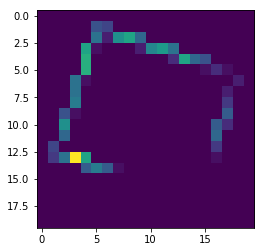

In [18]:
plt.imshow(grid)

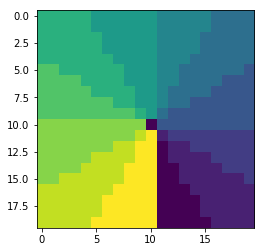

In [19]:
plt.imshow(get_sectors_grid(sectors_grid, (10,10)))